# Brief Exploratory Data Analysis for the Debt Management Department 
I was pleased to receive and email from the Debt Management Department of San Diego. To show my enthusiasm I’ve decided to add a brief exploratory data analysis of San Diego’s budget in order to show some of my programming abilities. The data I’m working with is from [sandiego.gov](https://data.sandiego.gov/datasets/operating-budget/).

## Libraries needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
df=pd.read_csv('budget_operating_datasd.csv')

## Years included in dataset
This dataset begins in 2011. 2021 only has ‘proposed’ budgets and therefore will be left out of this project.   

In [2]:
df=df[df['report_fy'] != 21]
df=df.sort_values(by='report_fy')
years=df.report_fy.unique()
print(years)

[11 12 13 14 15 16 17 18 19 20]


## Dropping 'proposed' budgets
Deciding to focus only on ‘adopted’ budgets our dataset decreases from 378304 rows to 292379 rows. Meaning that for the past 9 years around 44% of the proposed budgets were approved. 

In [3]:
print(df.shape)
df_approved=df[df.budget_cycle=='adopted']
print(df_approved.shape)

(378304, 9)
(292379, 9)


## Comparing the budget by year
We can see that 2013 is the only year when the budget was smaller than the previous year with all the other years increasing from the previous year. From 2019 to 2020 there is a larger increase than usual. Let’s see if we find out where the extra money went.  

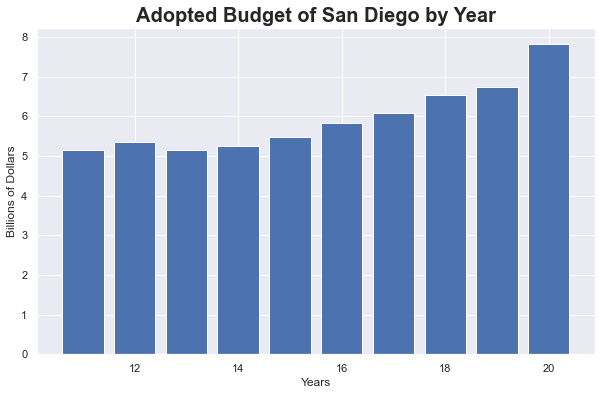

In [4]:
years=pd.DataFrame(years)
years.columns=['year']
years['total amount']=0
years=df_approved.groupby(['report_fy'])[['amount']].sum().reset_index()
years.amount=(years.amount/1000000000).round(2) 
years=years.rename(columns={'amount':'amount in billions'})
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.set_title('Adopted Budget of San Diego by Year',size=20,weight="bold")
_ = plt.bar(years.report_fy, years['amount in billions'])
_ = plt.xlabel('Years')
_ = plt.ylabel('Billions of Dollars')
plt.show()

## Fund Type
To see how the budget is divided up we can focus on the different fund types. All the fund types except 'Capital Project Funds' had an increase. A deeper analysis is needed to see if there is anything unusual about 2020. 

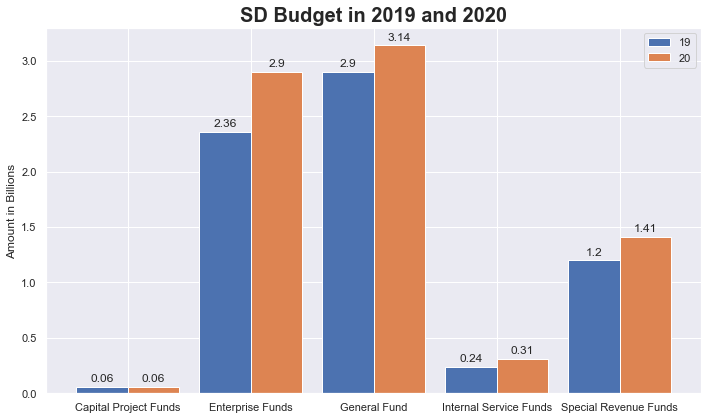

In [5]:
approved_20=df_approved[df_approved.report_fy==20]
approved_19=df_approved[df_approved.report_fy==19]
type_20=approved_20.groupby(['fund_type'])[['amount']].sum().reset_index()
type_19=approved_19.groupby(['fund_type'])[['amount']].sum().reset_index()   
type_20.amount=(type_20.amount/1000000000).round(2)
type_19.amount=(type_19.amount/1000000000).round(2)
labels=['Capital Project Funds','Enterprise Funds','General Fund','Internal Service Funds','Special Revenue Funds']
x_19=type_19.amount   
x_20=type_20.amount
x=np.arange(len(labels))
width =0.42
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
rects1=ax.bar(x - width/2, x_19, width, label='19')
rects2=ax.bar(x + width/2, x_20, width, label='20')
ax.set_ylabel('Amount in Billions')
ax.set_title('SD Budget in 2019 and 2020',size=20,weight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

## Diving deeper
We can divide up the budget one step further by looking at individual departments. There are 64 departments and there is no pretty way to visual that. Therefore, I've chosen the top 10 departments of 2020 to compare with the same departments of 2019. The only department that stands out is 'Public Utilities' by receiving an addtional $400 million. 

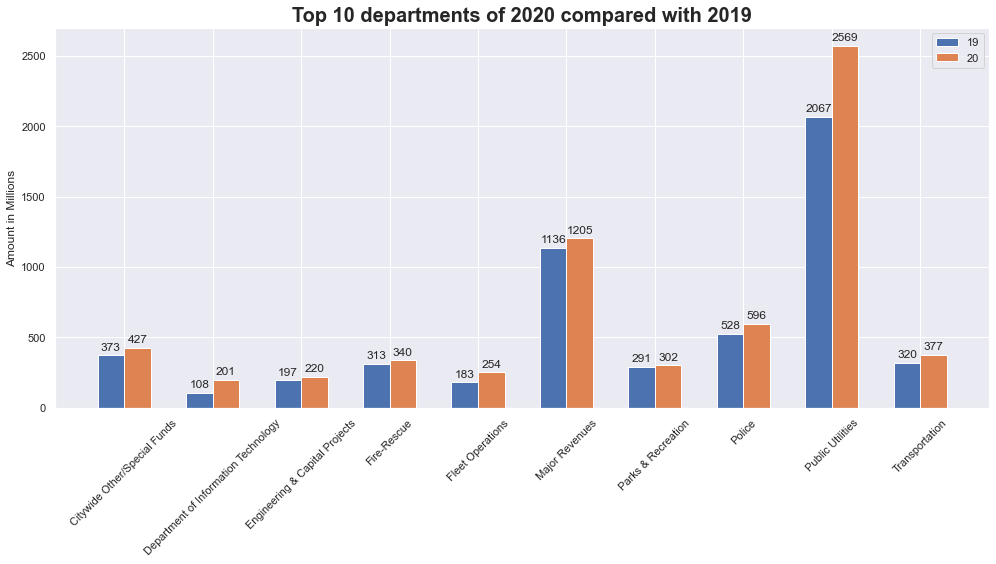

In [6]:
dept_20=pd.DataFrame(approved_20.groupby(['dept_name'])[['amount']].sum().reset_index())
dept_19=pd.DataFrame(approved_19.groupby(['dept_name'])[['amount']].sum().reset_index())
dept_20.amount=(dept_20.amount/1000000).astype(int)
dept_19.amount=(dept_19.amount/1000000).astype(int)
dept_20=dept_20.sort_values(by='amount',ascending=False)
new_dept_20=dept_20[:10].reset_index(drop=True)
departments=list(new_dept_20.dept_name)
cols={'dept_name':0,'amount':0}
new_dept_19=pd.DataFrame()                 
for i,r in dept_19.iterrows():    
    d=r[0]    
    if d in departments:        
        new_dept_19=pd.concat([new_dept_19, dept_19.loc[i]],axis=1)
new_dept_19=new_dept_19.T.reset_index(drop=True)
new_dept_19=new_dept_19.sort_values(by='dept_name').reset_index(drop=True)
new_dept_20=new_dept_20.sort_values(by='dept_name').reset_index(drop=True)
labels=['Citywide Other/Special Funds','Department of Information Technology','Engineering & Capital Projects',
        'Fire-Rescue','Fleet Operations','Major Revenues','Parks & Recreation','Police','Public Utilities',
        'Transportation']
x_19=new_dept_19.amount
x_20=new_dept_20.amount
x=np.arange(len(labels))
width =0.30
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
rects1=ax.bar(x - width/2, x_19, width, label='19')
rects2=ax.bar(x + width/2, x_20, width, label='20')
ax.set_ylabel('Amount in Millions')
ax.set_title('Top 10 departments of 2020 compared with 2019',size=20,weight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45)
ax.legend()
def autolabel(rects):    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

## Thanks for reading
To see my web scrapping, web automation, machine learning or more complex statistical inference abilities please click [here](https://github.com/jmetzg11).

I hope to hear back soon.